In [1]:
%load_ext autoreload
%autoreload 2
import sys, os
import pandas as pd
import numpy as np

sys.path.append(os.path.join(os.path.dirname(os.getcwd()))) # add parent folder to path
from flow import Paths
from figures.seqplots import plot_rep, plot_abcd, plot_seqs
from seq import rep

In [2]:
Folder, _, _, Subjects = Paths.ExpData(fig_subfolder = 'seqrep')

In [3]:
file_seq = os.path.join(Folder['SourceData'], 'sequences_individual.tsv')
Seq = pd.read_csv(file_seq).values # load individual sequences
Seq

array([[3, 1, 4, 2],
       [2, 4, 1, 3],
       [1, 2, 3, 4],
       [4, 3, 1, 2],
       [4, 2, 1, 3],
       [1, 4, 2, 3],
       [1, 3, 4, 2],
       [4, 1, 3, 2],
       [4, 2, 3, 1],
       [1, 3, 2, 4],
       [1, 2, 4, 3],
       [4, 1, 2, 3],
       [1, 4, 3, 2],
       [4, 3, 2, 1]])

/home/kristjan/_pubs/seq_plos_cb/fig/source/seqrep/ip5-0.1.png
/home/kristjan/_pubs/seq_plos_cb/fig/source/seqrep/ii5-0.1.png
/home/kristjan/_pubs/seq_plos_cb/fig/source/seqrep/ip5-0.6.png
/home/kristjan/_pubs/seq_plos_cb/fig/source/seqrep/ii5-0.6.png
/home/kristjan/_pubs/seq_plos_cb/fig/source/seqrep/ip5-0.7.png
/home/kristjan/_pubs/seq_plos_cb/fig/source/seqrep/ii5-0.7.png
/home/kristjan/_pubs/seq_plos_cb/fig/source/seqrep/ip5-0.99.png
/home/kristjan/_pubs/seq_plos_cb/fig/source/seqrep/ii5-0.99.png


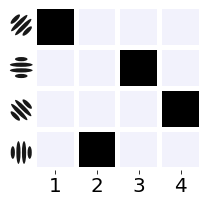

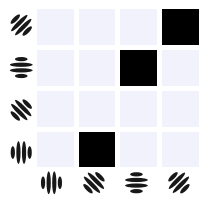

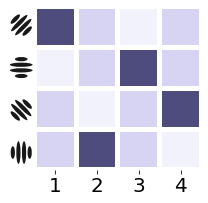

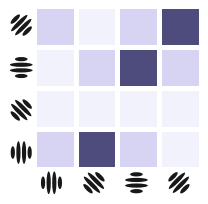

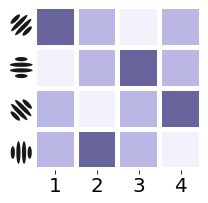

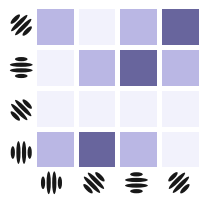

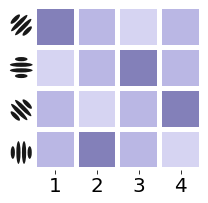

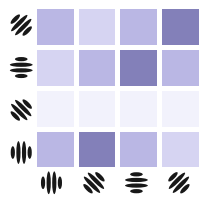

In [4]:
%autoreload plot_abcd
%matplotlib inline
filters = [0.1, 0.6, 0.7, 0.99]
suffix = ['ip','ii']
seq_id = 5
for f in filters:
    for i, s in enumerate(suffix):
        r = rep.seq_to_matrix(Seq[seq_id], model=s, sigma=f)
        #fig = plot_abcd(r, model=s)
        fig = plot_rep(r, model=s)
        plot_name = s + str(seq_id) + '-' + str(f) + '.png'
        file_name = os.path.join(Folder['Fig'], plot_name)
        print(file_name)
        #fig.savefig(file_name)

In [29]:
np.max(D)

1.9999888201238107

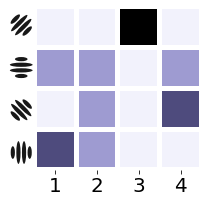

In [37]:
ix = [1, 3, 4]
sg = 0.2
m = 'ip'
D = rep.seq_to_matrix(Seq[ix[0]], model=m, sigma=sg) + \
    rep.seq_to_matrix(Seq[ix[1]], model=m, sigma=sg) + \
    rep.seq_to_matrix(Seq[ix[2]], model=m, sigma=sg)
fig = plot_rep(D/np.max(D), model=m)
fig.savefig(os.path.join(Folder['Fig'], 'ip.png'))

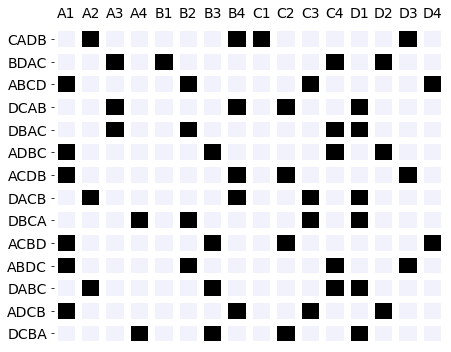

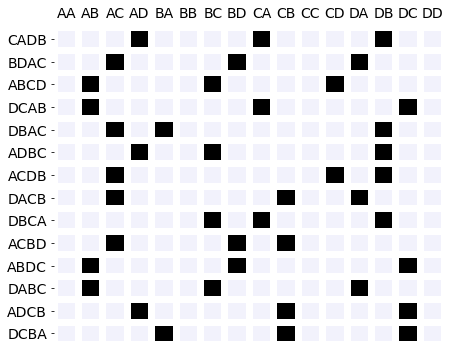

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

models = ['ip', 'ii']
sigma=0
for m in models:
    fig = plt.figure(figsize=(7, len(Seq) / 2.4))
    plot_seqs(Seq, model=m, sigma=sigma)
    fig.savefig(os.path.join(Folder['Fig'], 'units_' + m + '_s' + str(sigma) + '.png'))

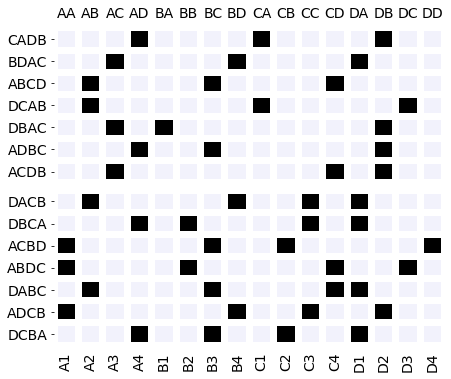

In [6]:
fig = plt.figure(figsize=(7, len(Seq) / 2.4))
Seqx = [Seq[:7], Seq[7:]]
for i,m in enumerate(['ii','ip']):
    ax = plt.subplot(2, 1, i+1)
    plot_seqs(Seqx[i], model=m, sigma=sigma)
    if i > 0:
        ax.tick_params(labeltop=False, labelbottom=True, labelsize=14, bottom=False)
plt.subplots_adjust(hspace=0.05)
fig.savefig(os.path.join(Folder['Fig'], 'units_btw.png'))